#### 미세먼지 현황 분석

##### 데이터 수집 사이트

- 어에코리아 : https://www.airkorea.or.kr/index
- 기상 자료 개방포털 : https://data.kma.go.kr/data/grnd/selectAwsRltmList.do?pgmNo=56

In [1]:
import pandas as pd
import numpy as np

In [83]:
dust2210 = pd.read_excel('./raw/202210_data_past_day.xlsx')
dust2210.drop(axis=0, index=[0], inplace=True) # 두번째 행 삭제
dust2210

,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스
1,2022-10-01,77,60,0.029,0.046,0.9,0.003
2,2022-10-02,37,27,0.021,0.027,0.7,0.003
3,2022-10-03,10,8,0.018,0.014,0.6,0.002
4,2022-10-04,18,8,0.016,0.017,0.6,0.002
5,2022-10-05,19,8,0.014,0.022,0.6,0.003
6,2022-10-06,9,4,0.011,0.020,0.5,0.003
7,2022-10-07,13,6,0.011,0.024,0.5,0.003
8,2022-10-08,10,5,0.012,0.025,0.5,0.003
9,2022-10-09,8,4,0.019,0.018,0.4,0.002
10,2022-10-10,9,4,0.022,0.013,0.3,0.002


In [84]:
dust2210.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 1 to 31
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      31 non-null     object
 1   PM10    31 non-null     object
 2   PM2.5   31 non-null     object
 3   오 존     31 non-null     object
 4   이산화질소   31 non-null     object
 5   일산화탄소   31 non-null     object
 6   아황산가스   31 non-null     object
dtypes: object(7)
memory usage: 1.8+ KB


In [85]:
# 컬럼명을 영문으로
dust2210.rename(columns={'날짜':'date', 'PM10':'pm10', 'PM2.5':'pm25', 
                         '오 존':'o3', '이산화질소':'no2', '일산화탄소':'co', '아황산가스':'so2'}, inplace=True)
dust2210

,date,pm10,pm25,o3,no2,co,so2
1,2022-10-01,77,60,0.029,0.046,0.9,0.003
2,2022-10-02,37,27,0.021,0.027,0.7,0.003
3,2022-10-03,10,8,0.018,0.014,0.6,0.002
4,2022-10-04,18,8,0.016,0.017,0.6,0.002
5,2022-10-05,19,8,0.014,0.022,0.6,0.003
6,2022-10-06,9,4,0.011,0.020,0.5,0.003
7,2022-10-07,13,6,0.011,0.024,0.5,0.003
8,2022-10-08,10,5,0.012,0.025,0.5,0.003
9,2022-10-09,8,4,0.019,0.018,0.4,0.002
10,2022-10-10,9,4,0.022,0.013,0.3,0.002


In [86]:
dust2210.dtypes

date    object
pm10    object
pm25    object
o3      object
no2     object
co      object
so2     object
dtype: object

In [87]:
dust2210 = dust2210.astype({'date':'datetime64[ns]', 'pm10':'int64', 'pm25':'int64', 'o3':'float64', 
                            'no2':'float64', 'co':'float64', 'so2':'float64'})
dust2210.tail()

,date,pm10,pm25,o3,no2,co,so2
27,2022-10-27,38,18,0.010,0.040,0.7,0.003
28,2022-10-28,47,30,0.010,0.038,0.8,0.003
29,2022-10-29,34,19,0.009,0.037,0.8,0.003
30,2022-10-30,28,18,0.011,0.034,0.8,0.003
31,2022-10-31,30,16,0.010,0.037,0.7,0.003


In [88]:
# 날짜를 년, 월, 일로 분해 컬럼 생성
dust2210['year'] = dust2210['date'].dt.year
dust2210['month'] = dust2210['date'].dt.month
dust2210['day'] = dust2210['date'].dt.day

In [89]:
dust2210.tail()

,date,pm10,pm25,o3,no2,co,so2,year,month,day
27,2022-10-27,38,18,0.010,0.040,0.7,0.003,2022,10,27
28,2022-10-28,47,30,0.010,0.038,0.8,0.003,2022,10,28
29,2022-10-29,34,19,0.009,0.037,0.8,0.003,2022,10,29
30,2022-10-30,28,18,0.011,0.034,0.8,0.003,2022,10,30
31,2022-10-31,30,16,0.010,0.037,0.7,0.003,2022,10,31


In [90]:
# 컬럼순서 재정렬
dust2210 = dust2210[['date','year','month','day','so2','co','o3','no2','pm10','pm25']]
dust2210.head()

,date,year,month,day,so2,co,o3,no2,pm10,pm25
1,2022-10-01,2022,10,1,0.003,0.9,0.029,0.046,77,60
2,2022-10-02,2022,10,2,0.003,0.7,0.021,0.027,37,27
3,2022-10-03,2022,10,3,0.002,0.6,0.018,0.014,10,8
4,2022-10-04,2022,10,4,0.002,0.6,0.016,0.017,18,8
5,2022-10-05,2022,10,5,0.003,0.6,0.014,0.022,19,8


In [91]:
dust2210.isnull().sum()

date     0
year     0
month    0
day      0
so2      0
co       0
o3       0
no2      0
pm10     0
pm25     0
dtype: int64

##### 기상청 데이터 확인 및 전처리

In [12]:
weather2210 = pd.read_excel('./raw/OBS_AWS_TIM_202210_data.xlsx')
weather2210

,지점,지점명,일시,기온(°C),풍속(m/s),강수량(mm),습도(%)
0,400,강남,2022-10-01 00:00:00,18.0,0.0,0.0,93
1,400,강남,2022-10-01 01:00:00,17.2,0.1,0.0,96
2,400,강남,2022-10-01 02:00:00,16.3,0.0,0.0,96
3,400,강남,2022-10-01 03:00:00,16.0,0.0,0.0,96
4,400,강남,2022-10-01 04:00:00,15.5,0.1,0.0,96
...,...,...,...,...,...,...,...
739,400,강남,2022-10-31 19:00:00,15.9,1.1,0.0,65
740,400,강남,2022-10-31 20:00:00,13.6,0.0,0.0,79
741,400,강남,2022-10-31 21:00:00,13.4,0.3,0.0,80
742,400,강남,2022-10-31 22:00:00,13.9,0.6,0.0,80


In [ ]:
# 지점, 지점명 컬럼 삭제
weather2210.drop('지점', axis=1, inplace=True)
weather2210.drop('지점명', axis=1, inplace=True)

In [19]:
weather2210.head()

,일시,기온(°C),풍속(m/s),강수량(mm),습도(%)
0,2022-10-01 00:00:00,18.0,0.0,0.0,93
1,2022-10-01 01:00:00,17.2,0.1,0.0,96
2,2022-10-01 02:00:00,16.3,0.0,0.0,96
3,2022-10-01 03:00:00,16.0,0.0,0.0,96
4,2022-10-01 04:00:00,15.5,0.1,0.0,96


In [20]:
weather2210.columns = ['date', 'temp', 'wind', 'rain', 'humid']
weather2210.head()

,date,temp,wind,rain,humid
0,2022-10-01 00:00:00,18.0,0.0,0.0,93
1,2022-10-01 01:00:00,17.2,0.1,0.0,96
2,2022-10-01 02:00:00,16.3,0.0,0.0,96
3,2022-10-01 03:00:00,16.0,0.0,0.0,96
4,2022-10-01 04:00:00,15.5,0.1,0.0,96


In [22]:
weather2210['date'] = pd.to_datetime(weather2210['date']).dt.date

In [27]:
weather2210 = weather2210.astype({'date':'datetime64[ns]'})

In [28]:
weather2210.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    744 non-null    datetime64[ns]
 1   temp    744 non-null    float64       
 2   wind    694 non-null    float64       
 3   rain    744 non-null    float64       
 4   humid   744 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 29.2 KB


In [29]:
weather2210.head()

,date,temp,wind,rain,humid
0,2022-10-01,18.0,0.0,0.0,93
1,2022-10-01,17.2,0.1,0.0,96
2,2022-10-01,16.3,0.0,0.0,96
3,2022-10-01,16.0,0.0,0.0,96
4,2022-10-01,15.5,0.1,0.0,96


In [103]:
weather2210.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    744 non-null    datetime64[ns]
 1   temp    744 non-null    float64       
 2   wind    744 non-null    float64       
 3   rain    744 non-null    float64       
 4   humid   744 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 29.2 KB


In [35]:
# 풍속 결측치를 0.0으로
weather2210['wind'].fillna(0.0, inplace=True)

In [36]:
weather2210.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    744 non-null    datetime64[ns]
 1   temp    744 non-null    float64       
 2   wind    744 non-null    float64       
 3   rain    744 non-null    float64       
 4   humid   744 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 29.2 KB


In [37]:
# 강수량은 0.1 단위로 측정 -> 0인 데이터는 0.01로 변경
weather2210['rain'] = weather2210['rain'].replace([0], 0.01)
weather2210['rain'].value_counts()

rain
0.01     697
0.50      15
2.00       6
1.50       6
2.50       6
1.00       4
4.00       2
5.50       2
3.00       1
5.00       1
3.50       1
12.00      1
6.00       1
6.50       1
Name: count, dtype: int64

In [40]:
weather_2210_new = weather2210.groupby(weather2210['date']).mean()
weather_2210_new.head()

,temp,wind,rain,humid
date,,,,
2022-10-01,20.841667,0.479167,0.010000,72.000000
2022-10-02,19.670833,0.833333,0.403750,78.458333
2022-10-03,21.675000,1.391667,2.230833,95.833333
2022-10-04,19.537500,1.529167,0.800000,80.041667
2022-10-05,17.279167,1.008333,0.030417,68.625000


##### 미세먼지, 날씨 데이터 병합

In [92]:
df_total = pd.merge(dust2210, weather_2210_new, how='inner', left_on='date', right_index=True)
df_total

,date,year,month,day,so2,co,o3,no2,pm10,pm25,temp,wind,rain,humid
1,2022-10-01,2022,10,1,0.003,0.9,0.029,0.046,77,60,20.841667,0.479167,0.010000,72.000000
2,2022-10-02,2022,10,2,0.003,0.7,0.021,0.027,37,27,19.670833,0.833333,0.403750,78.458333
3,2022-10-03,2022,10,3,0.002,0.6,0.018,0.014,10,8,21.675000,1.391667,2.230833,95.833333
4,2022-10-04,2022,10,4,0.002,0.6,0.016,0.017,18,8,19.537500,1.529167,0.800000,80.041667
5,2022-10-05,2022,10,5,0.003,0.6,0.014,0.022,19,8,17.279167,1.008333,0.030417,68.625000
6,2022-10-06,2022,10,6,0.003,0.5,0.011,0.020,9,4,16.712500,0.783333,0.030417,69.250000
7,2022-10-07,2022,10,7,0.003,0.5,0.011,0.024,13,6,15.845833,0.987500,0.010000,65.916667
8,2022-10-08,2022,10,8,0.003,0.5,0.012,0.025,10,5,15.675000,0.808333,0.010000,65.416667
9,2022-10-09,2022,10,9,0.002,0.4,0.019,0.018,8,4,13.804167,0.933333,0.713333,80.500000
10,2022-10-10,2022,10,10,0.002,0.3,0.022,0.013,9,4,10.637500,2.016667,0.112500,71.291667


In [93]:
# 인덱스 재정리
df_total.reset_index(drop=True, inplace=True)

In [94]:
df_total.tail()

,date,year,month,day,so2,co,o3,no2,pm10,pm25,temp,wind,rain,humid
26,2022-10-27,2022,10,27,0.003,0.7,0.010,0.040,38,18,13.270833,0.620833,0.01,70.750000
27,2022-10-28,2022,10,28,0.003,0.8,0.010,0.038,47,30,13.504167,0.370833,0.01,74.500000
28,2022-10-29,2022,10,29,0.003,0.8,0.009,0.037,34,19,13.441667,0.195833,0.01,74.666667
29,2022-10-30,2022,10,30,0.003,0.8,0.011,0.034,28,18,13.591667,0.125000,0.01,73.875000
30,2022-10-31,2022,10,31,0.003,0.7,0.010,0.037,30,16,14.833333,0.337500,0.01,67.708333


##### 상관관계 및 시각화

In [46]:
import matplotlib
# from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc, rcParams
import seaborn as sns

import pandas as pd
import numpy as np

font_path = 'C:/Windows/Fonts/NanumGothic.ttf'
font = font_manager.FontProperties(fname=font_path).get_name() # 'NanumGothic'
rc('font', family=font)
rcParams['axes.unicode_minus'] = False

In [95]:
# 모든 요소별 상관관계 확인
df_corr = df_total.corr()
df_corr

,date,year,month,day,so2,co,o3,no2,pm10,pm25,temp,wind,rain,humid
date,1.000000,NaN,NaN,1.000000,0.381221,0.208530,-0.457668,0.503002,0.275094,0.090111,-0.609468,-0.433317,-0.421551,-0.340149
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,1.000000,NaN,NaN,1.000000,0.381221,0.208530,-0.457668,0.503002,0.275094,0.090111,-0.609468,-0.433317,-0.421551,-0.340149
so2,0.381221,NaN,NaN,0.381221,1.000000,0.285043,-0.372860,0.623260,0.475565,0.341416,-0.302521,-0.478438,-0.615919,-0.475415
co,0.208530,NaN,NaN,0.208530,0.285043,1.000000,-0.127144,0.729971,0.642695,0.705239,0.460895,-0.679152,-0.116864,0.367551
o3,-0.457668,NaN,NaN,-0.457668,-0.372860,-0.127144,1.000000,-0.324132,0.269613,0.380716,0.402881,0.496085,0.296784,0.178093
no2,0.503002,NaN,NaN,0.503002,0.623260,0.729971,-0.324132,1.000000,0.716885,0.674974,-0.082965,-0.762963,-0.473173,-0.040719
pm10,0.275094,NaN,NaN,0.275094,0.475565,0.642695,0.269613,0.716885,1.000000,0.940332,0.128905,-0.304841,-0.325926,-0.112979
pm25,0.090111,NaN,NaN,0.090111,0.341416,0.705239,0.380716,0.674974,0.940332,1.000000,0.327993,-0.341629,-0.187423,0.152296


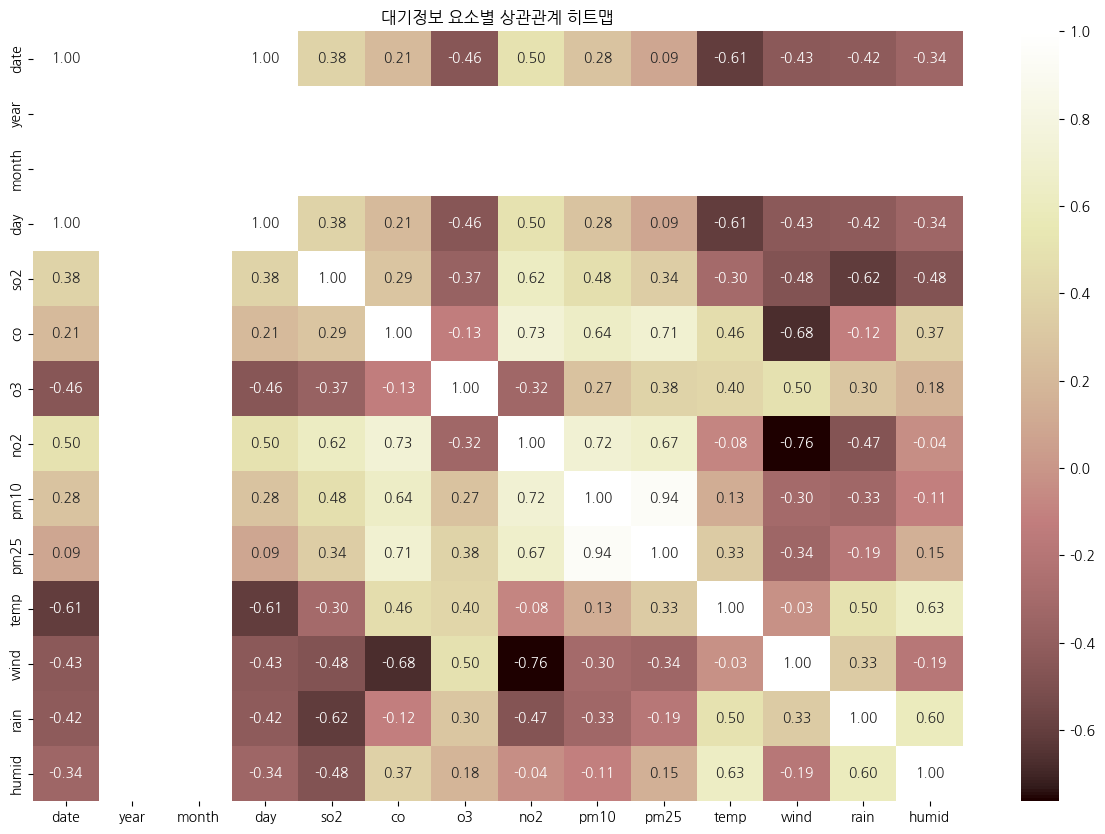

In [96]:
# 히트맵으로 상관관계 표시
plt.figure(figsize=(15, 10))
plt.title('대기정보 요소별 상관관계 히트맵')

sns.heatmap(data=df_corr, annot=True, fmt='.2f', cmap='pink')

plt.show()

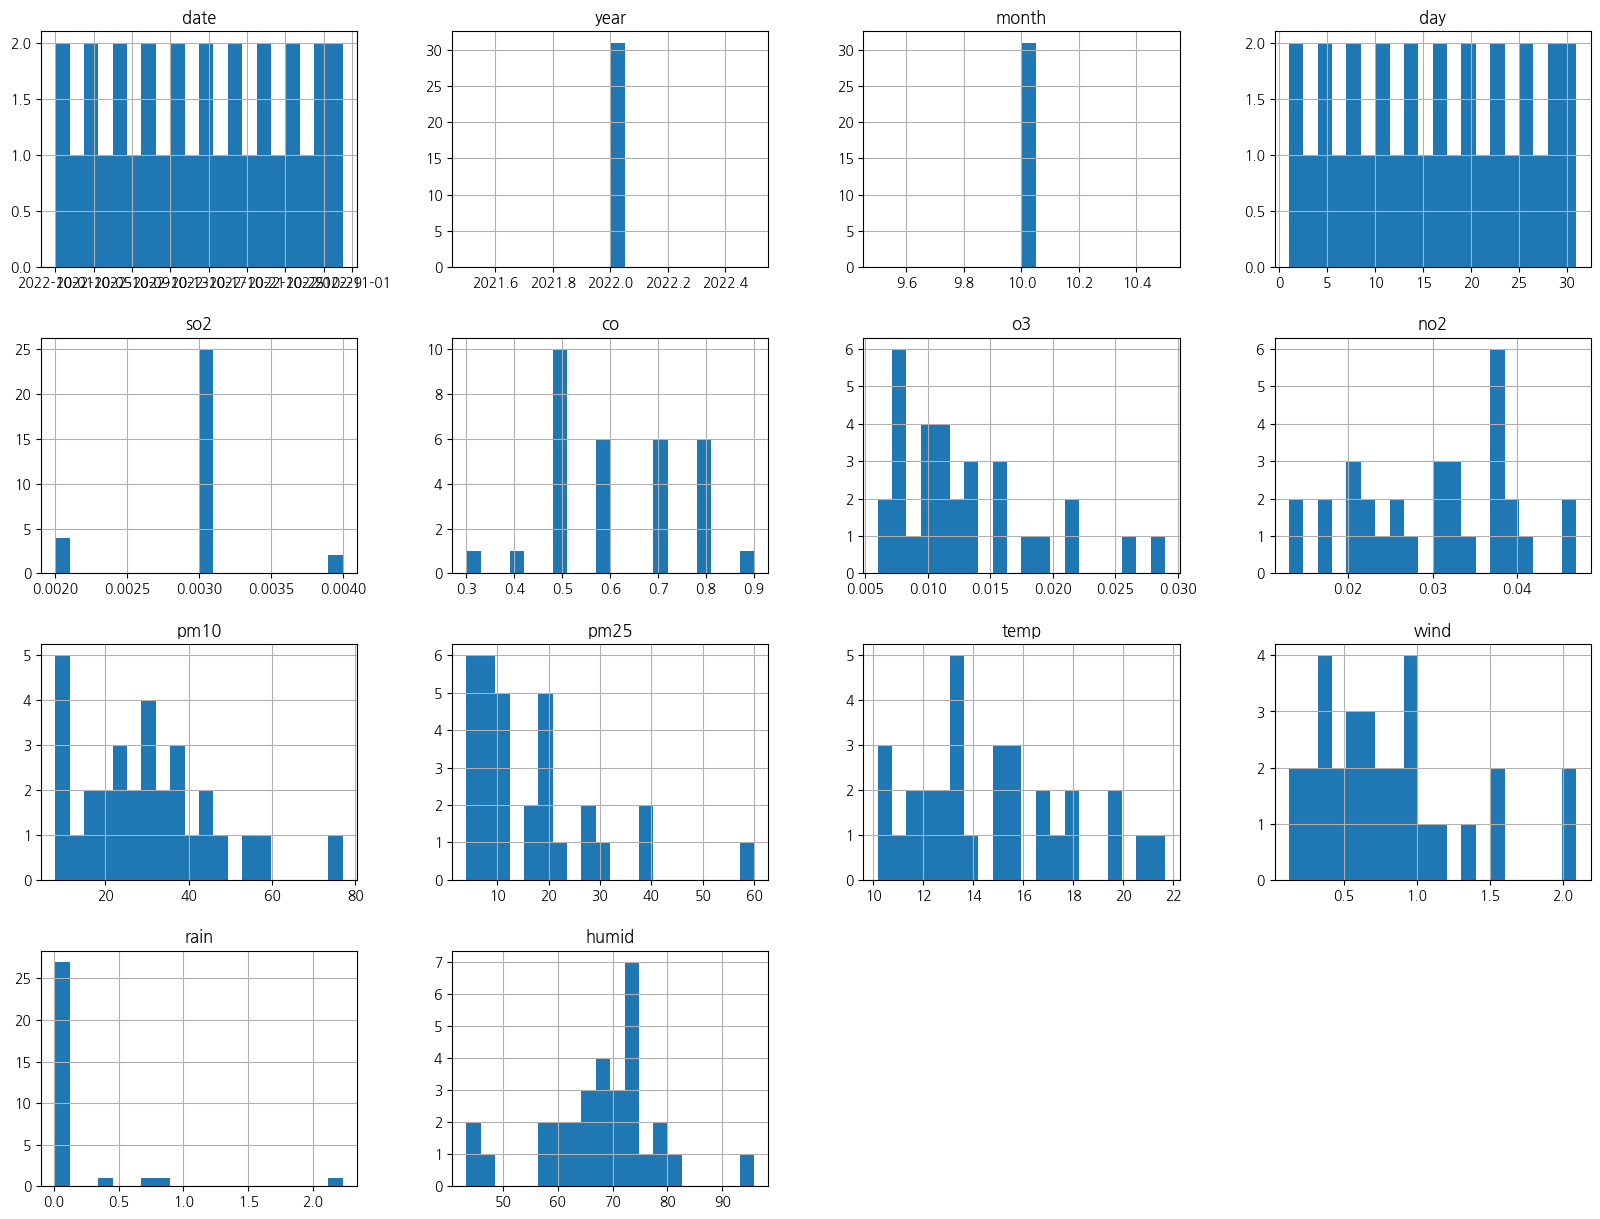

In [97]:
# 히스토그램 시각화
df_total.hist(bins=20, figsize=(20, 15))
plt.show()

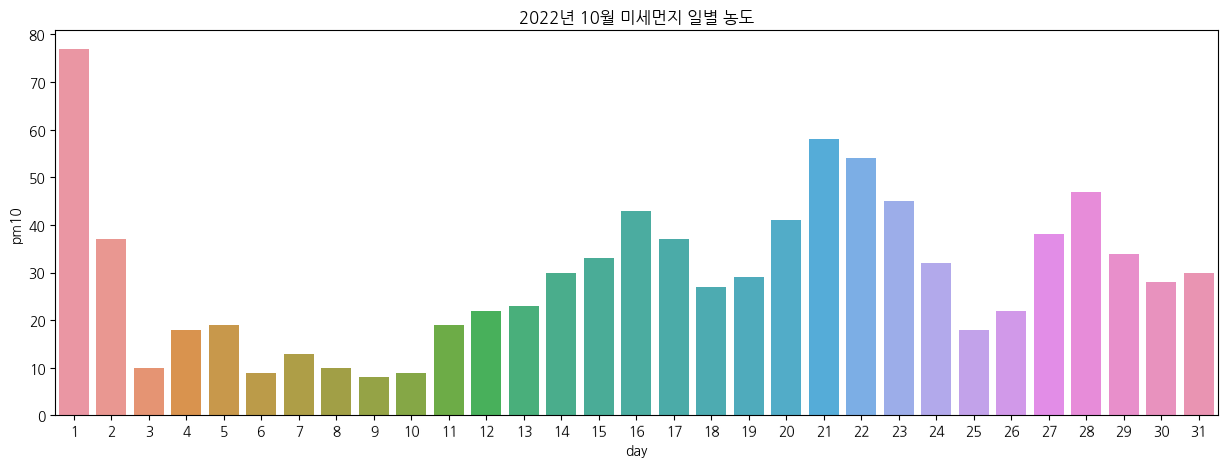

In [98]:
# 날짜별 미세먼지 농도
plt.figure(figsize=(15, 5))
plt.title('2022년 10월 미세먼지 일별 농도')
sns.barplot(x='day', y='pm10',data=df_total)
plt.xticks(rotation=1.0)
plt.show()

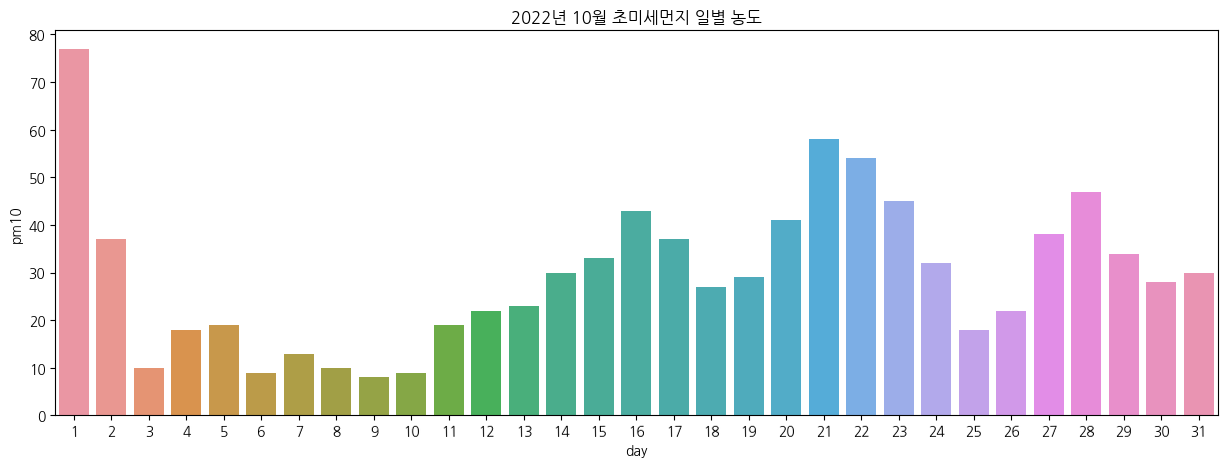

In [99]:
# 날짜별 초미세먼지 농도
plt.figure(figsize=(15, 5))
plt.title('2022년 10월 초미세먼지 일별 농도')
sns.barplot(x='day', y='pm10',data=df_total)
plt.xticks(rotation=1.0)
plt.show()

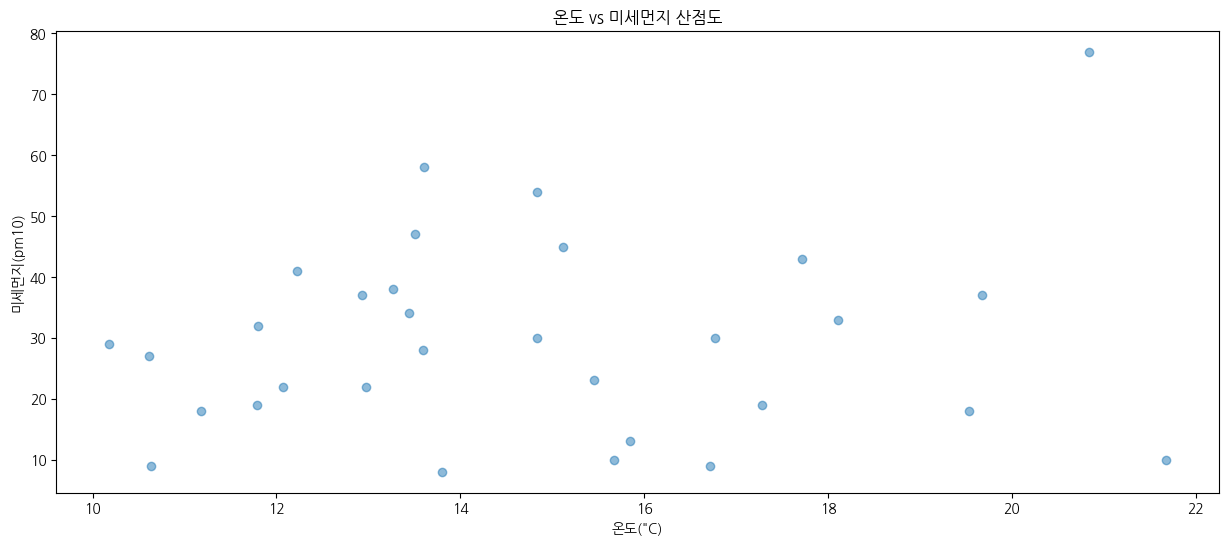

In [100]:
# 산점도 Scatterplot
plt.figure(figsize=(15, 6))
plt.title('온도 vs 미세먼지 산점도')
plt.plot(df_total['temp'], df_total['pm10'], marker='o', linestyle='none', alpha=0.5)
plt.xlabel('온도("C)')
plt.ylabel('미세먼지(pm10)')

plt.show()

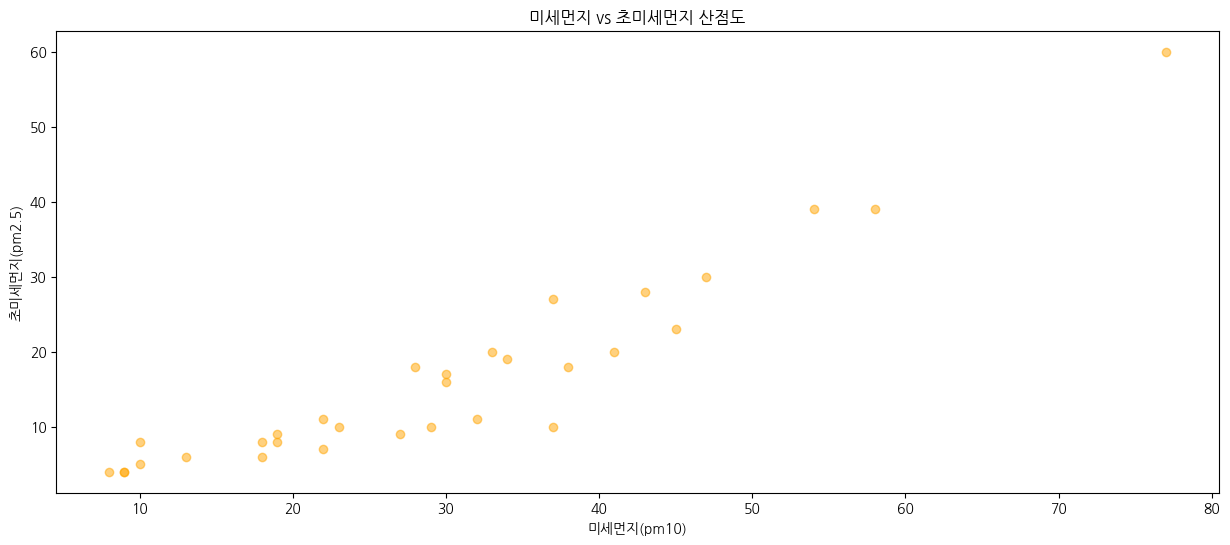

In [105]:
# 산점도 Scatterplot
plt.figure(figsize=(15, 6))
plt.title('미세먼지 vs 초미세먼지 산점도')
plt.plot(df_total['pm10'], df_total['pm25'], marker='o', linestyle='none', color='orange', alpha=0.5)
plt.xlabel('미세먼지(pm10)')
plt.ylabel('초미세먼지(pm2.5)')

plt.show()

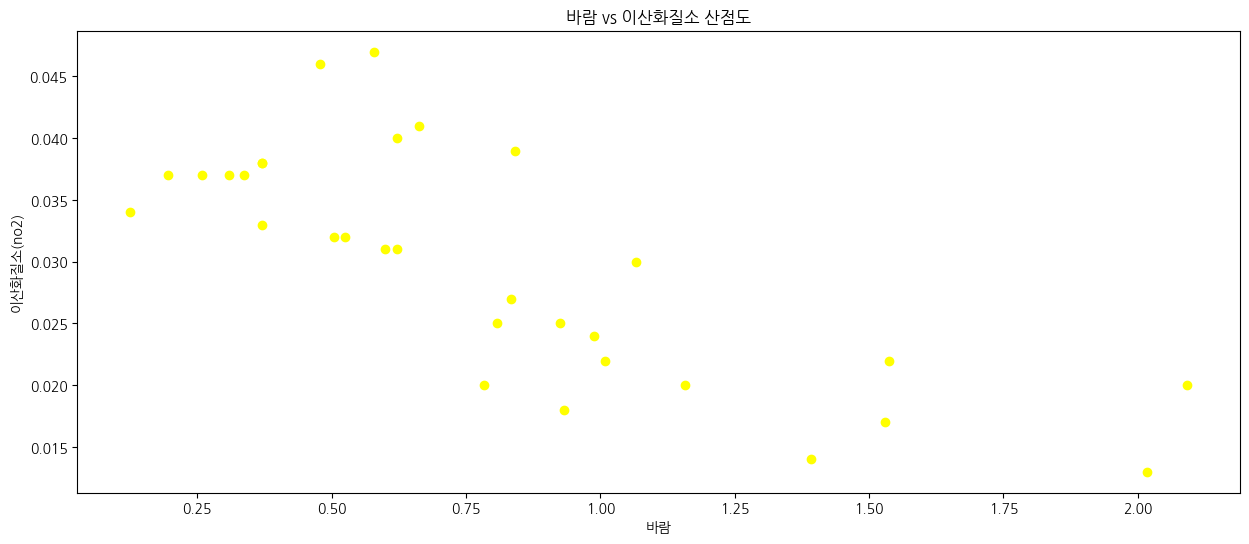

In [104]:
# 산점도 Scatterplot
plt.figure(figsize=(15, 6))
plt.title('바람 vs 이산화질소 산점도')
plt.plot(df_total['wind'], df_total['no2'], marker='o', linestyle='none', color='yellow')
plt.xlabel('바람')
plt.ylabel('이산화질소(no2)')

plt.show()